<a href="https://colab.research.google.com/github/RohithJ11/NLP_Privacy_Policies/blob/main/ModelComparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers datasets torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 24.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86

In [2]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.4 MB/s eta 0:00:00


In [3]:
pip install transformers


In [7]:
from transformers import BartTokenizer, BartForConditionalGeneration

def load_model(model_path):
    # Load the trained model and tokenizer
    model = BartForConditionalGeneration.from_pretrained(model_path)
    tokenizer = BartTokenizer.from_pretrained(model_path)
    return model, tokenizer

def summarize(text, model, tokenizer):
    # Encode the text into tensor of token ids
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)

    # Generate summary with the model
    summary_ids = model.generate(inputs, max_length=45, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Load your model (adjust the path to where your model is saved)
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'
model, tokenizer = load_model(model_path)

# Example text to summarize
text = "We may disclose deidentified, anonymized, or aggregated information internally and to third parties for any purpose, to the extent not prohibited by law. We will do our best to ensure the information will not identify you individually and otherwise comply with our obligations under applicable law, but we do not make assurances that such information is not capable of re-identification. However, we will not attempt to re-identify any information that we identify as de-identified information."

# Generate the summary
summary = summarize(text, model, tokenizer)
print("Summary:", summary)


Summary: We may disclose deidentified, anonymized, or aggregated information internally and to third parties for any purpose, to the extent not prohibited by law. We will do our best to ensure the information will not identify


In [8]:
from transformers import BartTokenizer, BartForConditionalGeneration

def load_model(model_path):
    # Load the trained model and tokenizer
    model = BartForConditionalGeneration.from_pretrained(model_path)
    tokenizer = BartTokenizer.from_pretrained(model_path)
    return model, tokenizer

def summarize(text, model, tokenizer):
    # Encode the text into tensor of token ids
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)  # Reduced max_length

    # Adjust the generation parameters for short content
    summary_ids = model.generate(
        inputs,
        max_length=75,  # Reduced max_length for summaries
        min_length=25,  # Set a reasonable minimum length to avoid overly terse summaries
        length_penalty=1.0,  # Lower penalty for shorter lengths
        num_beams=4,  # Moderate number of beams for balance between speed and quality
        early_stopping=True
    )

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Load your model (adjust the path to where your model is saved)
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'
model, tokenizer = load_model(model_path)

# Example text to summarize
text = "We may disclose deidentified, anonymized, or aggregated information internally and to third parties for any purpose, to the extent not prohibited by law. We will do our best to ensure the information will not identify you individually and otherwise comply with our obligations under applicable law, but we do not make assurances that such information is not capable of re-identification. However, we will not attempt to re-identify any information that we identify as de-identified information."

# Generate the summary
summary = summarize(text, model, tokenizer)
print("Summary:", summary)


Summary: We may disclose deidentified, anonymized, or aggregated information internally and to third parties for any purpose, to the extent not prohibited by law. We will do our best to ensure the information will not identify you individually and comply with obligations under applicable law, but we do not make assurances that such information is not capable of re-identification. However,


In [17]:
from transformers import BartTokenizer, BartForConditionalGeneration

def load_model(model_path):
    # Load the trained model and tokenizer
    model = BartForConditionalGeneration.from_pretrained(model_path)
    tokenizer = BartTokenizer.from_pretrained(model_path)
    return model, tokenizer

def summarize(text, model, tokenizer):
    # Encode the text into tensor of token ids
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=250,   truncation=True)

    # Adjust the generation parameters to encourage more concise and varied outputs
    summary_ids = model.generate(
        inputs,
        max_length=250,
        min_length=100,
        length_penalty=2.0,  # Increase length penalty to encourage shorter outputs
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=2,  # Prevent repeating n-grams in short summaries

    )

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Load your model (adjust the path to where your model is saved)
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'
model, tokenizer = load_model(model_path)

# Example text to summarize
text = "As a general rule, the Department does not collect PII about you when you visit our website, unless you choose to provide such information to us. Submitting PII through our website is voluntary. By doing so, you are giving the Department your permission to use the information for the stated purpose. However, not providing certain information may result in the Department’s inability to provide you with the service you desire. If you choose to provide us with PII on a Department website, through such methods as completing a web form or sending us an email, we will use that information to help us provide you the information or service you have requested or to respond to your message. The information we may receive from you varies based on what you do when visiting our site. Generally, the information requested by the Department will be used to respond to your inquiry or to provide you with the service you request. When this information is requested, the reasons for collecting it, a description of the Department’s intended use of the information, how to grant consent to use mandatorily provided information, and how to grant consent for other than statutorily mandated uses will be fully described in a separate customized “Privacy Notice.” This customized Privacy Notice will either appear on the web page collecting the information or be accessible through a hyperlink (link) prominently displayed immediately above or below the information request."

# Generate the summary
summary = summarize(text, model, tokenizer)
print("Summary:", summary)


Summary: As a general rule, the Department does not collect PII about you when you visit its website, unless you choose to provide such information to us through a web form or email. By doing so, you are giving the department permission to use the information for the stated purpose. However, not providing certain information may result in the lack of service provided to you. The information requested will be used to respond to your inquiry or provide the service you request. When requested, a detailed description of the reasons for collecting P II and how to grant consent for non-mandatory uses are included in a customized privacy notice.


In [1]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=718fb34a5a1ed0e5bde632d37142f641486f23b7919a63b6a1dce6dcaee0418c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


#Content 1

In [5]:
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'  # Replace with your own directory path
from transformers import BartTokenizer, BartForConditionalGeneration


extracted_text = "As a general rule, the Department does not collect PII about you when you visit our website, unless you choose to provide such information to us. Submitting PII through our website is voluntary. By doing so, you are giving the Department your permission to use the information for the stated purpose. However, not providing certain information may result in the Department’s inability to provide you with the service you desire. If you choose to provide us with PII on a Department website, through such methods as completing a web form or sending us an email, we will use that information to help us provide you the information or service you have requested or to respond to your message. The information we may receive from you varies based on what you do when visiting our site. Generally, the information requested by the Department will be used to respond to your inquiry or to provide you with the service you request. When this information is requested, the reasons for collecting it, a description of the Department’s intended use of the information, how to grant consent to use mandatorily provided information, and how to grant consent for other than statutorily mandated uses will be fully described in a separate customized “Privacy Notice.” This customized Privacy Notice will either appear on the web page collecting the information or be accessible through a hyperlink (link) prominently displayed immediately above or below the information request."


# Load the tokenizer
tokenizer = BartTokenizer.from_pretrained(model_path)

# Load the model
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to generate a summary
def generate_summary(text, tokenizer, model):
    inputs = tokenizer.encode_plus(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=5000,  # Adjust based on expected summary length
        min_length=500,
        num_beams=5,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Assuming 'extracted_text' is the variable that contains your cleaned text
summary = generate_summary(extracted_text, tokenizer, model)
print(summary)



from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "We only collect Personally Identifiable Information (PII) that you provide to us on our website. This is voluntary and if you choose to provide us with PII, we will use that information to respond to your inquiry or to provide you with the service you request. If you don't provide certain information, we may not be able to provide you with the service you desire. The reasons for collecting your information, its intended use, and how to grant consent for its use will be fully explained in a Privacy Notice. This notice will either appear on the web page where the information is collected or be accessible through a hyperlink."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)

As a general rule, the Department does not collect PII about you when you visit its website. Submitting PII through our website is voluntary, and by doing so, you are giving the Department permission to use the information for the stated purpose. However, not providing certain information may result in the Department's inability to provide you with the service you desire. If you choose to provide PII via a web form or email, the information will be used to provide the information or service you have requested or to respond to your message. The reasons for collecting PII, the intended use of the information, and how to grant consent for mandatorily mandated uses will be detailed in a customized Privacy Notice. This Privacy Notice will appear on the web page collecting the information and can be accessible through a hyperlink prominently displayed above or below the information request. The information requested by the Department will typically be used for responding to your inquiry or p

In [6]:
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'  # Replace with your own directory path
from transformers import BartTokenizer, BartForConditionalGeneration


extracted_text = "The Department uses social media websites and other kinds of third-party websites. The Department uses social media websites to interact with foreign constituencies and engage in public diplomacy worldwide. Social media websites are used to publicize embassy and Department events, and engage with members of the public in foreign countries. The Department also uses web measurement and customization technologies to measure the number of visitors to our websites and their various sections and to help make our websites more useful to visitors. In such cases, the third-party application may request an email address, username, password, and geographic location (e.g., State, region, or ZIP code) for account registration purposes. The Department of State does not use third-party websites to solicit and collect PII from individuals. Any PII passively collected (i.e., not solicited) by the third-party website will not be transmitted or stored by the Department; no PII will be disclosed, sold or transferred to any other entity outside the Department, unless required for law enforcement purposes or by statute.  The Department uses various types of online surveys to collect opinions and feedback from a random sample of visitors. Primarily, state.gov uses the ForeSee Results’ American Customer Satisfaction Index (ACSI) online survey on an ongoing basis to obtain feedback and data on visitors’ satisfaction with the state.gov website. This survey does not collect PII. Although the survey invitation pops up for a random sample of visitors, it is optional. If you decline the survey, you will still have access to the identical information and resources at the state.gov site as those who do take the survey. The survey reports are available only to state.gov managers and other designated staff who require this information to perform their duties. The Department may use other limited-time surveys for specific purposes, which are explained at the time they are posted.  The Department retains the data from the ACSI survey results as long as needed to support the mission of the state.gov website."


# Load the tokenizer
tokenizer = BartTokenizer.from_pretrained(model_path)

# Load the model
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to generate a summary
def generate_summary(text, tokenizer, model):
    inputs = tokenizer.encode_plus(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=5000,  # Adjust based on expected summary length
        min_length=500,
        num_beams=5,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Assuming 'extracted_text' is the variable that contains your cleaned text
summary = generate_summary(extracted_text, tokenizer, model)
print(summary)



from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "The Department uses social media and third-party websites to interact with foreign constituencies and publicize embassy and Department events. The Department uses web measurement technologies to make their websites more useful to visitors. No personally identifiable information is collected passively by the third-party website. The Department uses surveys to collect opinions and feedback, with the ForeSee Results' American Customer Satisfaction Index (ACSI) online survey being the most commonly used. The survey is optional and does not collect personally identifiable information. The Department retains ACSI survey data as long as needed to support the state.gov website mission."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)

The Department of State uses social media websites and other kinds of third-party websites to interact with foreign constituencies and engage in public diplomacy worldwide. Social media websites are used to publicize embassy and Department events, and engage with members of the public in foreign countries. The Department also uses web measurement and customization technologies to measure the number of visitors to our websites and their various sections. Third-party applications may request email addresses, username, password, and geographic locations for account registration purposes.  The Department uses various types of online surveys to collect opinions and feedback from a random sample of visitors. Primarily, state.gov uses the ForeSee Results’ American Customer Satisfaction Index (ACSI) online survey on an ongoing basis to obtain feedback and data on visitors' satisfaction with the website. This survey does not collect PII, and participants are invited to take the survey, which is

In [7]:
model_path = '/content/drive/MyDrive/trained_model/BARTsavedmodel'  # Replace with your own directory path
from transformers import BartTokenizer, BartForConditionalGeneration


extracted_text = "At Apple, we respect your ability to know, access, correct, transfer, restrict the processing of, and delete your personal data. We have provided these rights to our global customer base and if you choose to exercise these privacy rights, you have the right not to be treated in a discriminatory way nor to receive a lesser degree of service from Apple. Where you are requested to consent to the processing of your personal data by Apple, you have the right to withdraw your consent at any time.  To exercise your privacy rights and choices, including where a third-party service provider is acting on Apple’s behalf, visit the Apple Data and Privacy page at privacy.apple.com for Apple or shazam.com/privacy for Shazam. To help protect the security of your personal data, you must sign in to your account and your identity will be verified. If you want to obtain a copy of personal data that is not currently available from privacy.apple.com, you can make a request at apple.com/legal/privacy/contact. You also have the right to lodge a complaint with the applicable regulator.  There may be situations where we cannot grant your request — for example, if you ask us to delete your transaction data and Apple is legally obligated to keep a record of that transaction to comply with law. We may also decline to grant a request where doing so would undermine our legitimate use of data for anti-fraud and security purposes, such as when you request deletion of an account that is being investigated for security concerns. Other reasons your privacy request may be denied are if it jeopardizes the privacy of others, is frivolous or vexatious, or would be extremely impractical or unreasonable."

# Load the tokenizer
tokenizer = BartTokenizer.from_pretrained(model_path)

# Load the model
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to generate a summary
def generate_summary(text, tokenizer, model):
    inputs = tokenizer.encode_plus(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=5000,  # Adjust based on expected summary length
        min_length=500,
        num_beams=5,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Assuming 'extracted_text' is the variable that contains your cleaned text
summary = generate_summary(extracted_text, tokenizer, model)
print(summary)



from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "At Apple, we respect your privacy rights to know, access, correct, transfer, restrict, and delete your personal data. You can exercise these rights without being discriminated against or receiving lesser service. If you have given consent for data processing, you can withdraw it anytime. Visit privacy.apple.com for Apple or shazam.com/privacy for Shazam to exercise your rights. For personal data not found at privacy.apple.com, request it at apple.com/legal/privacy/contact. Complaints can be lodged with the applicable regulator. We may decline your request if it jeopardizes other's privacy, is frivolous, or unreasonable. We may also decline if it undermines our anti-fraud and security purposes."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)

At Apple, we respect your ability to know, access, correct, transfer, restrict the processing of, and delete your personal data. We have provided these rights to our global customer base and if you choose to exercise these privacy rights, you have the right not to be treated in a discriminatory way nor to receive a lesser degree of service from Apple.  To exercise your privacy rights and choices, visit the Apple Data and Privacy page at privacy.apple.com for Apple or shazam.com/privacy for Shazam, where you must sign in to your account and your identity will be verified.  If you want to obtain a copy of personal data that is not currently available, you can make a request at Apple's legal privacy page, and you can lodge a complaint with the applicable regulator.  There may be situations where we cannot grant your request, such as if you ask us to delete your transaction data and Apple is legally obligated to keep a record of that transaction to comply with law. We may also decline to g

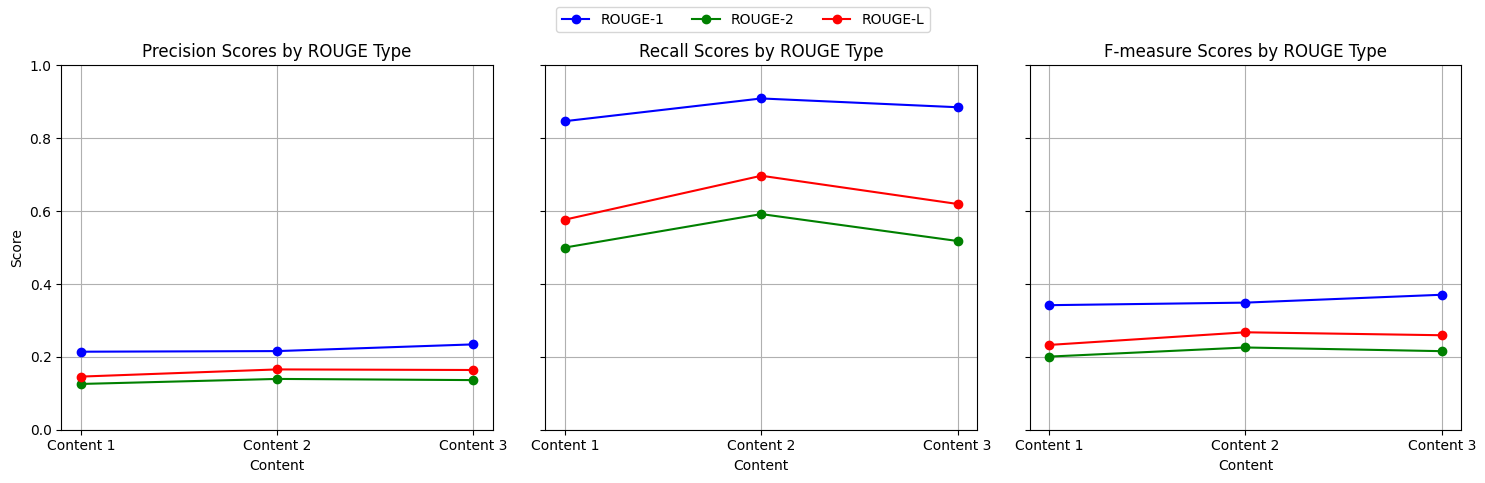

In [8]:
import matplotlib.pyplot as plt

# ROUGE scores for three different contents
data = {
    "Content 1": {
        "ROUGE-1": {"Precision": 0.2141, "Recall": 0.8468, "F-measure": 0.3418},
        "ROUGE-2": {"Precision": 0.1256, "Recall": 0.5, "F-measure": 0.2007},
        "ROUGE-L": {"Precision": 0.1458, "Recall": 0.5766, "F-measure": 0.2327}
    },
    "Content 2": {
        "ROUGE-1": {"Precision": 0.2158, "Recall": 0.9091, "F-measure": 0.3488},
        "ROUGE-2": {"Precision": 0.1394, "Recall": 0.5918, "F-measure": 0.2257},
        "ROUGE-L": {"Precision": 0.1655, "Recall": 0.6970, "F-measure": 0.2674}
    },
    "Content 3": {
        "ROUGE-1": {"Precision": 0.2342, "Recall": 0.8850, "F-measure": 0.3704},
        "ROUGE-2": {"Precision": 0.1362, "Recall": 0.5179, "F-measure": 0.2156},
        "ROUGE-L": {"Precision": 0.1639, "Recall": 0.6195, "F-measure": 0.2593}
    }
}

# Plotting the ROUGE scores
metrics = ["Precision", "Recall", "F-measure"]
rouge_types = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]
colors = ['b', 'g', 'r']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    for rouge_type, color in zip(rouge_types, colors):
        values = [data[content][rouge_type][metric] for content in data]
        ax.plot(data.keys(), values, 'o-', label=f"{rouge_type}", color=color)
    ax.set_title(f"{metric} Scores by ROUGE Type")
    ax.set_xlabel("Content")
    ax.set_ylim(0, 1)
    ax.grid(True)

axs[0].set_ylabel("Score")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#T5

In [9]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Load the model and tokenizer
model_path = '/content/drive/MyDrive/trained_model/T5model2'
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Prepare input text
input_text = "As a general rule, the Department does not collect PII about you when you visit our website, unless you choose to provide such information to us. Submitting PII through our website is voluntary. By doing so, you are giving the Department your permission to use the information for the stated purpose. However, not providing certain information may result in the Department’s inability to provide you with the service you desire. If you choose to provide us with PII on a Department website, through such methods as completing a web form or sending us an email, we will use that information to help us provide you the information or service you have requested or to respond to your message. The information we may receive from you varies based on what you do when visiting our site. Generally, the information requested by the Department will be used to respond to your inquiry or to provide you with the service you request. When this information is requested, the reasons for collecting it, a description of the Department’s intended use of the information, how to grant consent to use mandatorily provided information, and how to grant consent for other than statutorily mandated uses will be fully described in a separate customized “Privacy Notice.” This customized Privacy Notice will either appear on the web page collecting the information or be accessible through a hyperlink (link) prominently displayed immediately above or below the information request."

inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

# Generate the summary
output_tokens = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_length=150,
    num_beams=5,
    early_stopping=True
)

# Decode and print the summary
summary = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print(summary)

from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "We only collect Personally Identifiable Information (PII) that you provide to us on our website. This is voluntary and if you choose to provide us with PII, we will use that information to respond to your inquiry or to provide you with the service you request. If you don't provide certain information, we may not be able to provide you with the service you desire. The reasons for collecting your information, its intended use, and how to grant consent for its use will be fully explained in a Privacy Notice. This notice will either appear on the web page where the information is collected or be accessible through a hyperlink."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


the Department does not collect PII about you when you visit our website, unless you choose to provide such information to us. Submitting PII through our website is voluntary. The Department does not collect PII about you when you visit our website, unless you choose to provide such information to us. This customized Privacy Notice will appear on the web page collecting the information or be accessible through a hyperlink (link) prominently above or below the information request.
ROUGE Scores: {'rouge1': Score(precision=0.6410256410256411, recall=0.45045045045045046, fmeasure=0.5291005291005292), 'rouge2': Score(precision=0.2597402597402597, recall=0.18181818181818182, fmeasure=0.21390374331550802), 'rougeL': Score(precision=0.4358974358974359, recall=0.3063063063063063, fmeasure=0.3597883597883598)}


In [10]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Load the model and tokenizer
model_path = '/content/drive/MyDrive/trained_model/T5model2'
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Prepare input text
input_text = "The Department uses social media websites and other kinds of third-party websites. The Department uses social media websites to interact with foreign constituencies and engage in public diplomacy worldwide. Social media websites are used to publicize embassy and Department events, and engage with members of the public in foreign countries. The Department also uses web measurement and customization technologies to measure the number of visitors to our websites and their various sections and to help make our websites more useful to visitors. In such cases, the third-party application may request an email address, username, password, and geographic location (e.g., State, region, or ZIP code) for account registration purposes. The Department of State does not use third-party websites to solicit and collect PII from individuals. Any PII passively collected (i.e., not solicited) by the third-party website will not be transmitted or stored by the Department; no PII will be disclosed, sold or transferred to any other entity outside the Department, unless required for law enforcement purposes or by statute.  The Department uses various types of online surveys to collect opinions and feedback from a random sample of visitors. Primarily, state.gov uses the ForeSee Results’ American Customer Satisfaction Index (ACSI) online survey on an ongoing basis to obtain feedback and data on visitors’ satisfaction with the state.gov website. This survey does not collect PII. Although the survey invitation pops up for a random sample of visitors, it is optional. If you decline the survey, you will still have access to the identical information and resources at the state.gov site as those who do take the survey. The survey reports are available only to state.gov managers and other designated staff who require this information to perform their duties. The Department may use other limited-time surveys for specific purposes, which are explained at the time they are posted.  The Department retains the data from the ACSI survey results as long as needed to support the mission of the state.gov website."
inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

# Generate the summary
output_tokens = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_length=150,
    num_beams=5,
    early_stopping=True
)

# Decode and print the summary
summary = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print(summary)

from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "The Department uses social media and third-party websites to interact with foreign constituencies and publicize embassy and Department events. The Department uses web measurement technologies to make their websites more useful to visitors. No personally identifiable information is collected passively by the third-party website. The Department uses surveys to collect opinions and feedback, with the ForeSee Results' American Customer Satisfaction Index (ACSI) online survey being the most commonly used. The survey is optional and does not collect personally identifiable information. The Department retains ACSI survey data as long as needed to support the state.gov website mission."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


to obtain feedback and data on visitors’ satisfaction with the state.gov website. This survey does not collect PII. The Department uses social media websites and other kinds of third-party websites. The Department uses social media websites to interact with foreign constituencies and engage in public diplomacy worldwide. The Department uses social media websites to interact with foreign constituencies and engage in public diplomacy worldwide.
ROUGE Scores: {'rouge1': Score(precision=0.6212121212121212, recall=0.41414141414141414, fmeasure=0.49696969696969695), 'rouge2': Score(precision=0.35384615384615387, recall=0.23469387755102042, fmeasure=0.28220858895705525), 'rougeL': Score(precision=0.3484848484848485, recall=0.23232323232323232, fmeasure=0.2787878787878788)}


In [11]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Load the model and tokenizer
model_path = '/content/drive/MyDrive/trained_model/T5model2'
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Prepare input text
input_text = "At Apple, we respect your ability to know, access, correct, transfer, restrict the processing of, and delete your personal data. We have provided these rights to our global customer base and if you choose to exercise these privacy rights, you have the right not to be treated in a discriminatory way nor to receive a lesser degree of service from Apple. Where you are requested to consent to the processing of your personal data by Apple, you have the right to withdraw your consent at any time.  To exercise your privacy rights and choices, including where a third-party service provider is acting on Apple’s behalf, visit the Apple Data and Privacy page at privacy.apple.com for Apple or shazam.com/privacy for Shazam. To help protect the security of your personal data, you must sign in to your account and your identity will be verified. If you want to obtain a copy of personal data that is not currently available from privacy.apple.com, you can make a request at apple.com/legal/privacy/contact. You also have the right to lodge a complaint with the applicable regulator.  There may be situations where we cannot grant your request — for example, if you ask us to delete your transaction data and Apple is legally obligated to keep a record of that transaction to comply with law. We may also decline to grant a request where doing so would undermine our legitimate use of data for anti-fraud and security purposes, such as when you request deletion of an account that is being investigated for security concerns. Other reasons your privacy request may be denied are if it jeopardizes the privacy of others, is frivolous or vexatious, or would be extremely impractical or unreasonable."
inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

# Generate the summary
output_tokens = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_length=150,
    num_beams=5,
    early_stopping=True
)

# Decode and print the summary
summary = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print(summary)

from rouge_score import rouge_scorer

def compute_rouge_scores(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Example usage
reference_summary = "At Apple, we respect your privacy rights to know, access, correct, transfer, restrict, and delete your personal data. You can exercise these rights without being discriminated against or receiving lesser service. If you have given consent for data processing, you can withdraw it anytime. Visit privacy.apple.com for Apple or shazam.com/privacy for Shazam to exercise your rights. For personal data not found at privacy.apple.com, request it at apple.com/legal/privacy/contact. Complaints can be lodged with the applicable regulator. We may decline your request if it jeopardizes other's privacy, is frivolous, or unreasonable. We may also decline if it undermines our anti-fraud and security purposes."
#generated_summary = summarize(text, model, tokenizer)

# Compute ROUGE scores
rouge_scores = compute_rouge_scores(reference_summary, summary)
print("ROUGE Scores:", rouge_scores)




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


.apple.com for Apple or shazam.com/privacy for Shazam. To exercise your privacy rights, you have the right to withdraw your consent at any time. Apple respects your ability to know, access, correct, transfer, restrict the processing of, and delete your personal data. You have the right to withdraw your consent at any time.
ROUGE Scores: {'rouge1': Score(precision=0.7454545454545455, recall=0.36283185840707965, fmeasure=0.48809523809523814), 'rouge2': Score(precision=0.5, recall=0.24107142857142858, fmeasure=0.3253012048192771), 'rougeL': Score(precision=0.36363636363636365, recall=0.17699115044247787, fmeasure=0.23809523809523814)}


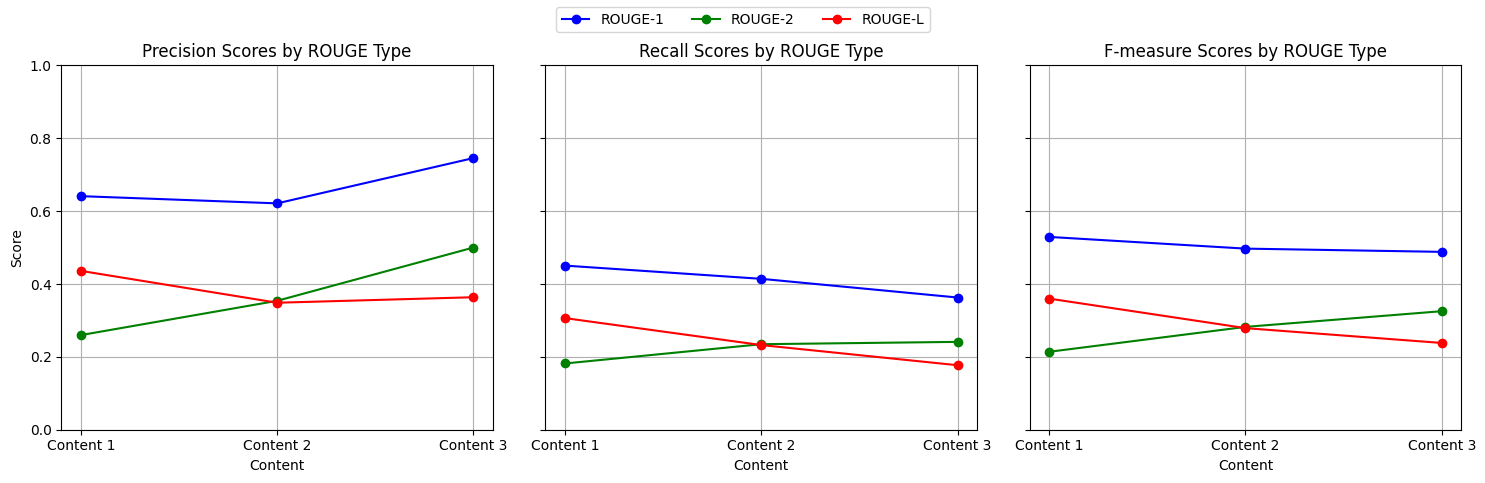

In [12]:
import matplotlib.pyplot as plt

# Updated ROUGE scores for three different contents
data_updated = {
    "Content 1": {
        "ROUGE-1": {"Precision": 0.6410, "Recall": 0.4504, "F-measure": 0.5291},
        "ROUGE-2": {"Precision": 0.2597, "Recall": 0.1818, "F-measure": 0.2139},
        "ROUGE-L": {"Precision": 0.4359, "Recall": 0.3063, "F-measure": 0.3598}
    },
    "Content 2": {
        "ROUGE-1": {"Precision": 0.6212, "Recall": 0.4141, "F-measure": 0.4970},
        "ROUGE-2": {"Precision": 0.3538, "Recall": 0.2347, "F-measure": 0.2822},
        "ROUGE-L": {"Precision": 0.3485, "Recall": 0.2323, "F-measure": 0.2788}
    },
    "Content 3": {
        "ROUGE-1": {"Precision": 0.7455, "Recall": 0.3628, "F-measure": 0.4881},
        "ROUGE-2": {"Precision": 0.5000, "Recall": 0.2411, "F-measure": 0.3253},
        "ROUGE-L": {"Precision": 0.3636, "Recall": 0.1770, "F-measure": 0.2381}
    }
}

# Plotting the ROUGE scores
metrics = ["Precision", "Recall", "F-measure"]
rouge_types = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]
colors = ['b', 'g', 'r']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    for rouge_type, color in zip(rouge_types, colors):
        values = [data_updated[content][rouge_type][metric] for content in data_updated]
        ax.plot(data_updated.keys(), values, 'o-', label=f"{rouge_type}", color=color)
    ax.set_title(f"{metric} Scores by ROUGE Type")
    ax.set_xlabel("Content")
    ax.set_ylim(0, 1)
    ax.grid(True)

axs[0].set_ylabel("Score")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
